# 1. Install, Imports, Settings

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [30]:
plt.rcParams["figure.figsize"] = [10, 6]
%config InlineBackend.figure_format = 'retina'

# 2. Load data

In [31]:
df = pd.read_csv("data/alertas.csv", sep="|")
print("Total Number of documents:", len(df))
print("Number of documents with no accesible text (pass protected):", len(df[df['Text'].isnull()]))
print("Number of documents with accesible text:",  len(df[df['Text'].notnull()]))

Total Number of documents: 1753
Number of documents with no accesible text (pass protected): 5
Number of documents with accesible text: 1748


In [32]:
df.head()

,Filename,Text,Subtype,Type,Year,Path,Departamento
0,"AT N° 003-18 NAR-Cumbitara, Maguí Payán, Polic...",Defensoria \ndel Pueblo \nCOLOMB IA \n \nBog...,Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 003-18 NAR-...,Nariño
1,AT N° 004-18 NAR-Tumaco.pdf,Defensoría \ndel Pueblo \nCO LO Mllt \nCarre...,Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 004-18 NAR-...,Nariño
2,AT N° 005-18 COR-Tierralta.pdf,Carrera 9 16 21 Bogotá DC \nPBX 57 1 3147300...,Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 005-18 COR-...,Córdoba
3,AT N° 006-18 ARA-Saravena.pdf,Defensoría \ndel Pueblo \nCarrera 9 1621 Bo...,Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 006-18 ARA-...,Arauca
4,"AT N° 007-18 MET-Puerto Lleras, Puerto Rico y ...",San Vicente Bajo \nl \nMargen \nIzquierda ...,Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 007-18 MET-...,Meta


# 3. Number of Documents by Type and Subtype

In [33]:
df.groupby(["Type", "Subtype"]).agg({"Filename":"count"})

Filename
Type        Subtype                         
Advertencia Alerta Temprana              378
            Informe de Riesgo            681
            Notas                        558
Seguimiento Informe de Seguimiento       136

In [34]:
len(df[df.Subtype == "Not Identified"])

0

# 3.1 Statistical Distribution by SubType

In [44]:
df.groupby(["Type", "Subtype"]).agg({"Filename":"count"}).describe()

,Filename
count,4.000000
mean,438.250000
std,236.821135
min,136.000000
25%,317.500000
50%,468.000000
75%,588.750000
max,681.000000


# 4 Number of documents by Year

In [35]:
df.groupby(["Type", "Subtype", "Year"]).agg({"Filename":"count"})

Filename
Type        Subtype                Year          
Advertencia Alerta Temprana        2001        71
                                   2002        72
                                   2017         1
                                   2018        85
                                   2019        56
                                   2020        54
                                   2021        25
                                   2022        14
            Informe de Riesgo      2002        20
                                   2003        84
                                   2004        90
                                   2005        65
                                   2006        52
                                   2007        38
                                   2008        32
                                   2009        31
                                   2010        21
                                   2011        20
                                   2012        31
                                   2013        40
                                   2014        36
                                   2015        27
                                   2016        42
                                   2017        52
            Notas                  2002        39
                                   2003        82
                                   2004        63
                                   2005        31
                                   2006        38
                                   2007        52
                                   2008        39
                                   2009        35
                                   2010        30
                                   2011        30
                                   2012        23
                                   2013        17
                                   2014        19
                                   2015        31
                                   2016        15
                                   2017        14
Seguimiento Informe de Seguimiento 2018         7
                                   2019        54
                                   2020        35
                                   2021        32
                                   2022         8

In [39]:
dfg = df.groupby(["Subtype", "Year"]).agg({"Filename":"count"}).reset_index()
dfg = pd.pivot_table(dfg, values='Filename', index=['Year'],
                    columns=['Subtype'], aggfunc=np.sum)
dfg = dfg.fillna(0)

Text(0, 0.5, 'Number of Documents')

<Figure size 720x432 with 0 Axes>

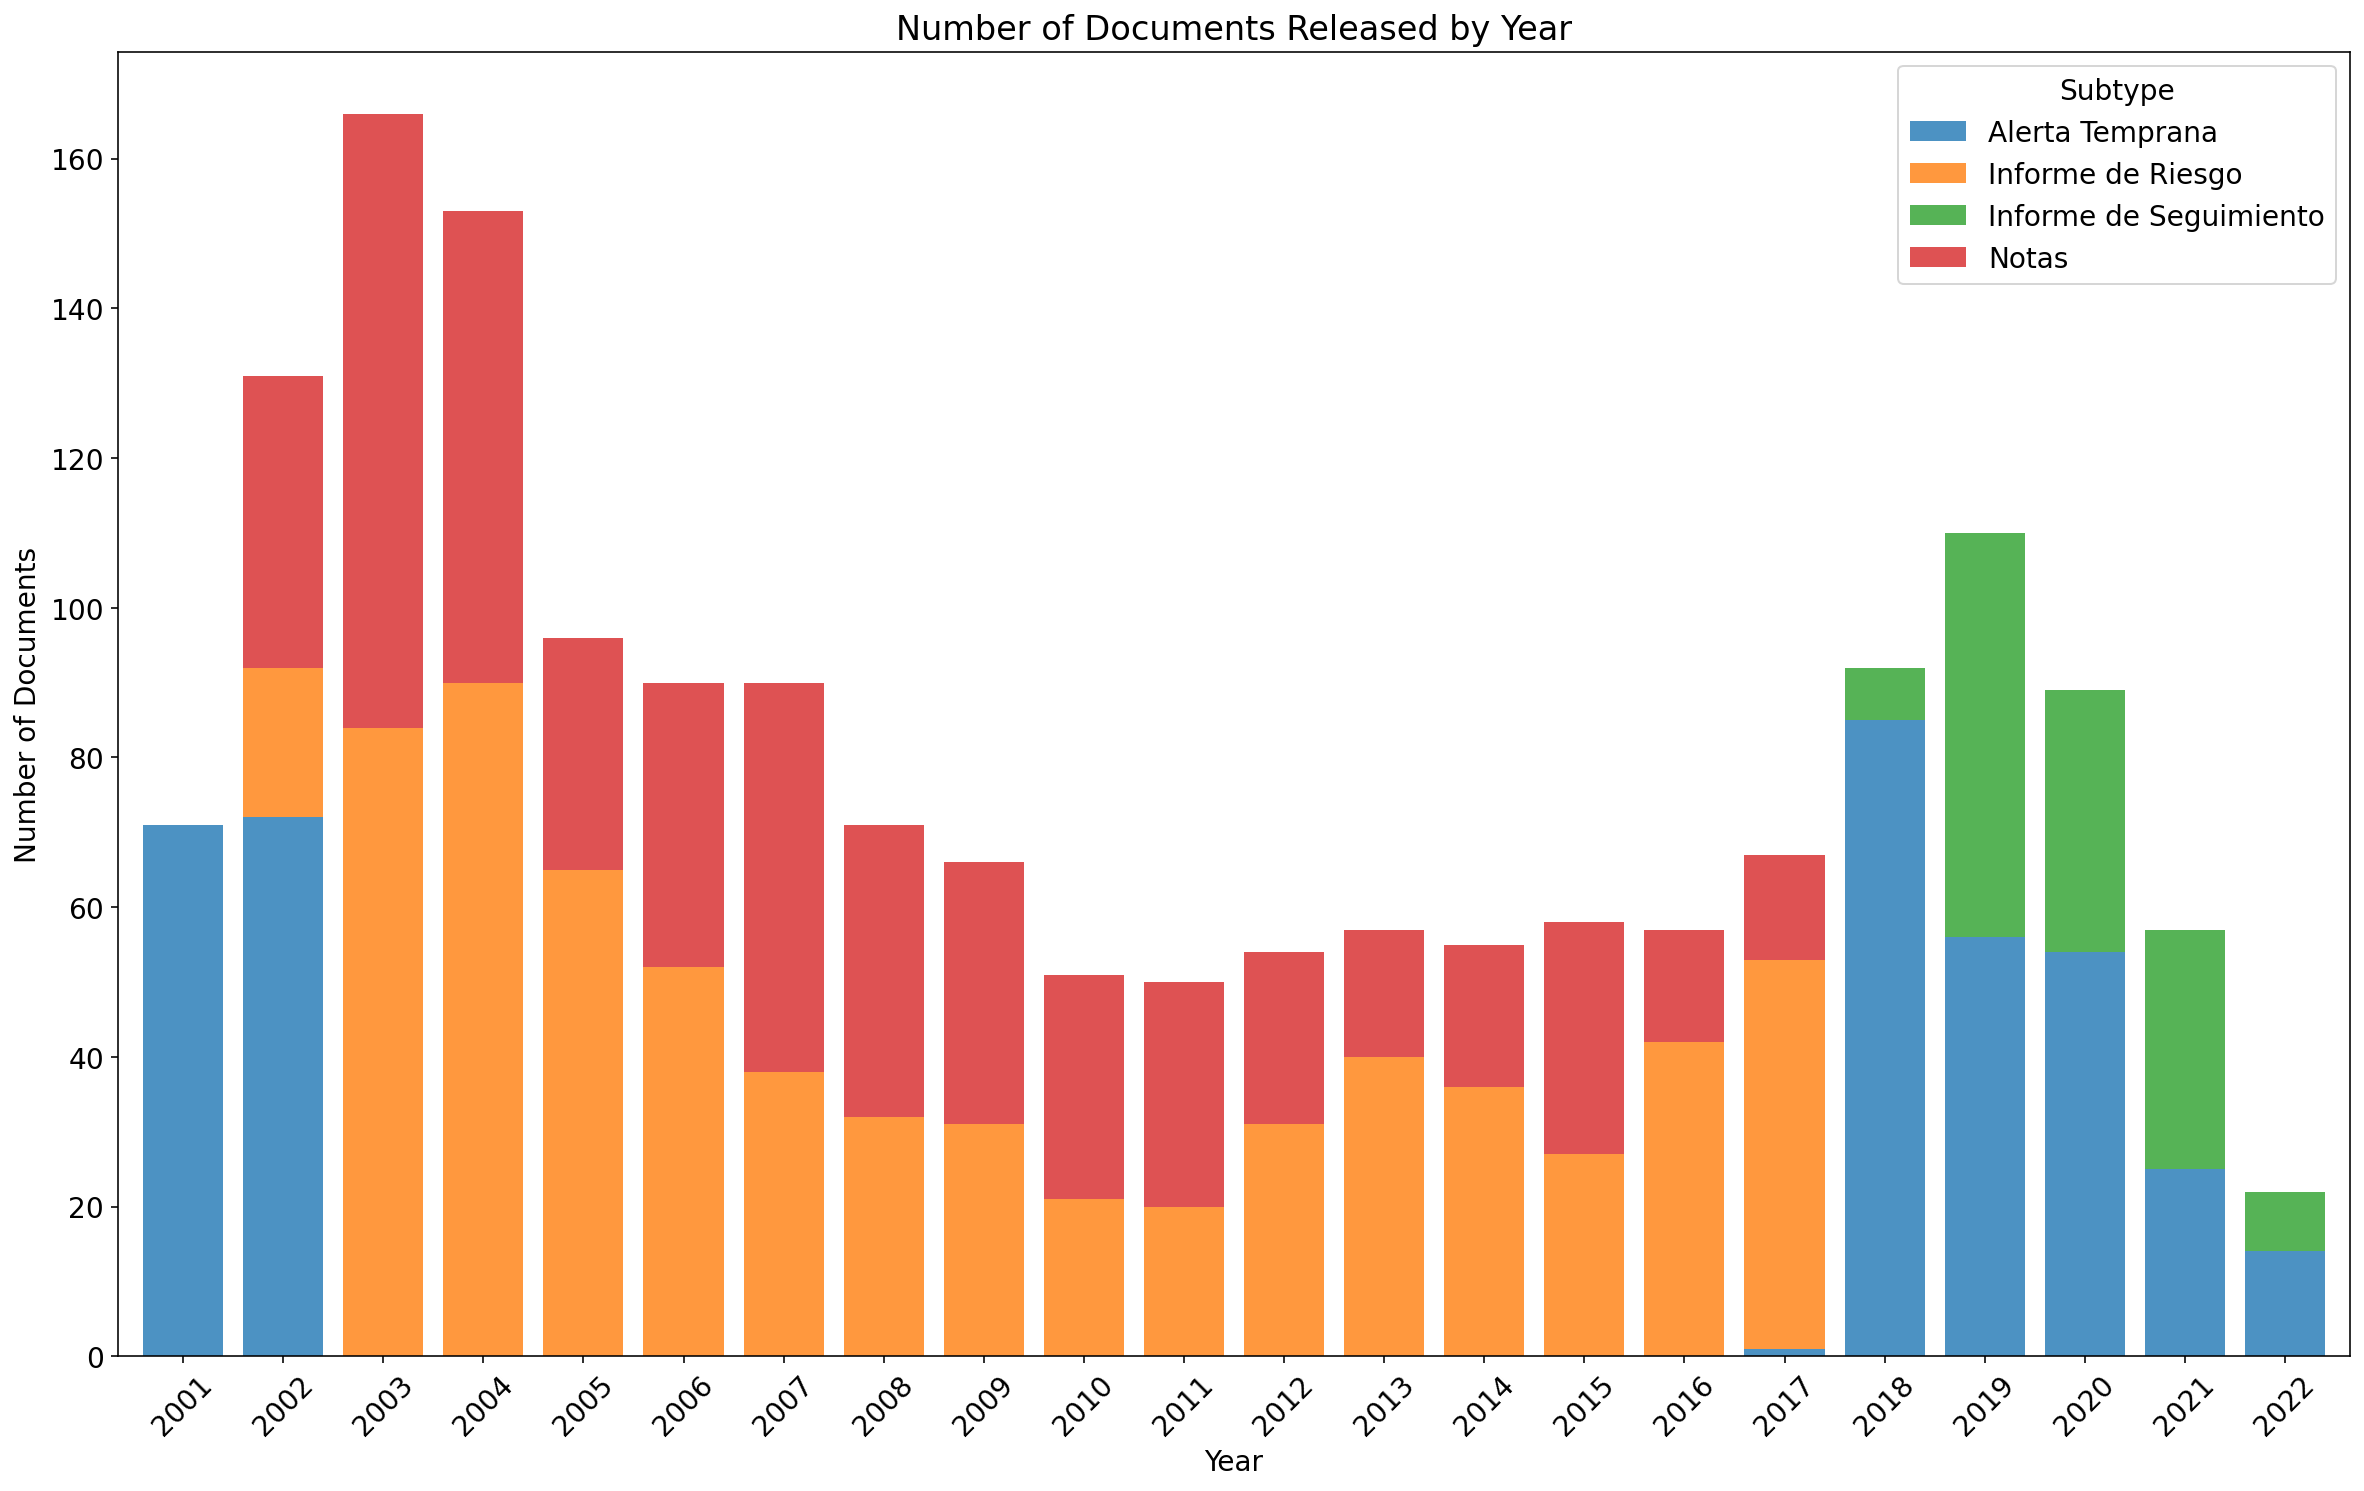

In [42]:
plt.figure()
plt.rcParams.update({'font.size': 14})

dfg.plot(kind="bar", figsize=(20, 12), stacked = True, width=0.8, alpha=0.8, rot=45)
plt.title("Number of Documents Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Documents")

# 5. Top Years - Sort Descending

In [17]:
dfh = df.groupby(["Year"]).agg({"Filename":"count"}).sort_values("Filename", ascending = False)
dfh.columns = ["Number of documents"]
dfh

,Number of documents
Year,
2003,166
2004,153
2002,131
2019,110
2005,96
2018,92
2006,90
2007,90
2020,89


# 6. Statistical Distribution of Number of Documents per Year

In [18]:
dfh.describe()

,Number of documents
count,22.000000
mean,79.681818
std,35.124793
min,22.000000
25%,57.000000
50%,69.000000
75%,91.500000
max,166.000000


# 7. Statistical Distribution per Period

In [19]:
df1 = dfh[dfh.index < 2006]
df2 = dfh[(dfh.index > 2005) & (dfh.index < 2012)]
df3 = dfh[(dfh.index > 2011) & (dfh.index < 2017)]
df4 = dfh[dfh.index > 2016]

# 7.1 2001 - 2005 (Conflicto, 2005 Justicia y Paz)

In [20]:
df1

,Number of documents
Year,
2003,166
2004,153
2002,131
2005,96
2001,71


In [21]:
df1.describe()

,Number of documents
count,5.000000
mean,123.400000
std,39.513289
min,71.000000
25%,96.000000
50%,131.000000
75%,153.000000
max,166.000000


# 7.2 2006- 2011 (Conflicto)

In [22]:
df2

,Number of documents
Year,
2006,90
2007,90
2008,71
2009,66
2010,51
2011,50


In [23]:
df2.describe()

,Number of documents
count,6.000000
mean,69.666667
std,17.761381
min,50.000000
25%,54.750000
50%,68.500000
75%,85.250000
max,90.000000


# 7.3 2012 - 2016 (Negociaciones de Paz, Acuerdo de La Habana)

In [24]:
df3

,Number of documents
Year,
2015,58
2013,57
2016,57
2014,55
2012,54


In [25]:
df3.describe()

,Number of documents
count,5.000000
mean,56.200000
std,1.643168
min,54.000000
25%,55.000000
50%,57.000000
75%,57.000000
max,58.000000


# 7.4 2017 - 2022 (Post- Acuerdo)

In [26]:
df4

,Number of documents
Year,
2019,110
2018,92
2020,89
2017,67
2021,57
2022,22


In [27]:
df4.describe()

,Number of documents
count,6.000000
mean,72.833333
std,31.237264
min,22.000000
25%,59.500000
50%,78.000000
75%,91.250000
max,110.000000


# 7. Export HTML

In [45]:
!jupyter nbconvert --to html 3_Distribution_of_documents_Time.ipynb

[NbConvertApp] Converting notebook 3_Distribution_of_documents_Time.ipynb to html
[NbConvertApp] Writing 732160 bytes to 3_Distribution_of_documents_Time.html
